(735234.0, 736727.0)

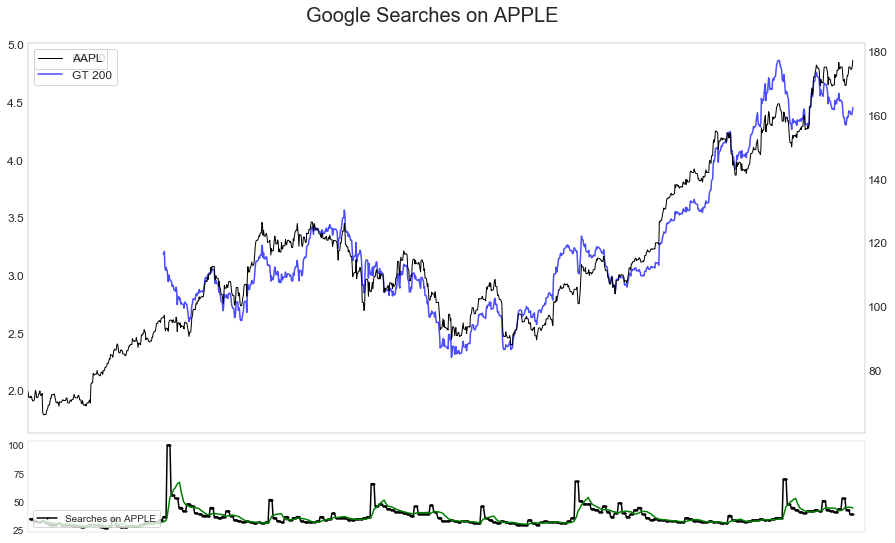

In [282]:
from pytrends.request import TrendReq
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt
import datetime as datetime
from datetime import timedelta
%matplotlib inline

Today = datetime.datetime.now().strftime("%Y-%m-%d")
Limit = (datetime.datetime.now()+timedelta(20)).strftime("%Y-%m-%d")

pytrend = TrendReq()

keyword = 'APPLE'
ticker = 'AAPL'

start = '2014-01-01'

pytrend.build_payload(kw_list=[keyword],timeframe=start+' '+Today)
interest_over_time_df = pytrend.interest_over_time()

df = pd.DataFrame(interest_over_time_df[keyword])
Stock = pd.DataFrame(web.DataReader(ticker, data_source='yahoo', start=start, end=Today)['Adj Close'])

combo = df.merge(Stock,left_index=True,right_index=True,how='outer')
combo = combo.fillna(method='ffill')
combo.tail()
combo.columns = ['Search','Close']

ax1 = plt.subplot2grid((10,10), (0,0), rowspan=8, colspan=10)
ax3 = plt.subplot2grid((10,10), (8,0), rowspan=2, colspan=10,sharex=ax1)

plt.style.use('seaborn-white')
plt.rcParams['axes.linewidth'] = 0.1
plt.suptitle('Google Searches on '+str(keyword),y=0.93,fontsize=20)

(combo.Close/combo.Search.rolling(50).mean()).plot(ax=ax1, color='red', figsize=(15,10),alpha=0,label='GT 50')
(combo.Close/combo.Search.rolling(200).mean()).plot(ax=ax1, color='blue',alpha=0.7,label='GT 200')

ax1.legend(loc=2,fontsize='large',frameon=1)
ax1.tick_params(axis='both', which='major', labelsize=12)

ax2 = ax1.twinx()

combo.Close.plot(ax=ax2, color='black', label=str(ticker),lw=1)
ax2.legend(loc=2,  fontsize='large',frameon=1)
ax2.tick_params(axis='both', which='major', labelsize=12)

combo.Search.plot(ax=ax3, color='black', label='Searches on '+str(keyword),markevery=range(len(combo.Search)),
                        marker='o',markersize=1,alpha=1)
combo.Search.rolling(20).mean().plot(ax=ax3, color='green',label='')
ax3.legend(loc=3,frameon=1)

ax1.set_xlim([start, Limit])
ax2.set_xlim([start, Limit])
ax3.set_xlim([start, Limit])

In [289]:
import time

start = '2016-01-01'

keywords = ['TWTR','NFLX','MSFT','BABA','AAPL','TSLA']
searches = ['Twitter','Netflix','Microsoft','Alibaba','Apple','Tesla']


Today = datetime.datetime.now().strftime("%Y-%m-%d")
Limit = (datetime.datetime.now()+timedelta(20)).strftime("%Y-%m-%d")
pytrend = TrendReq()

for i in range(0,len(keywords)):
    
    data = []
    
    pytrend.build_payload(kw_list=[searches[i]],timeframe=start+' '+Today)
    globals()['Keyword%s' % i] = pytrend.interest_over_time()
    data.append(globals()['Keyword%s' % i])
    data.append(pd.DataFrame(web.DataReader(keywords[i], data_source='yahoo', start=start, end=Today)['Adj Close']))
    time.sleep(0.5)
    globals()['df%s' % i] = pd.concat(data,axis=1)
    globals()['df%s' % i] = globals()['df%s' % i].fillna(method='ffill').dropna()
    globals()['df%s' % i] = globals()['df%s' % i].T.drop('isPartial').T

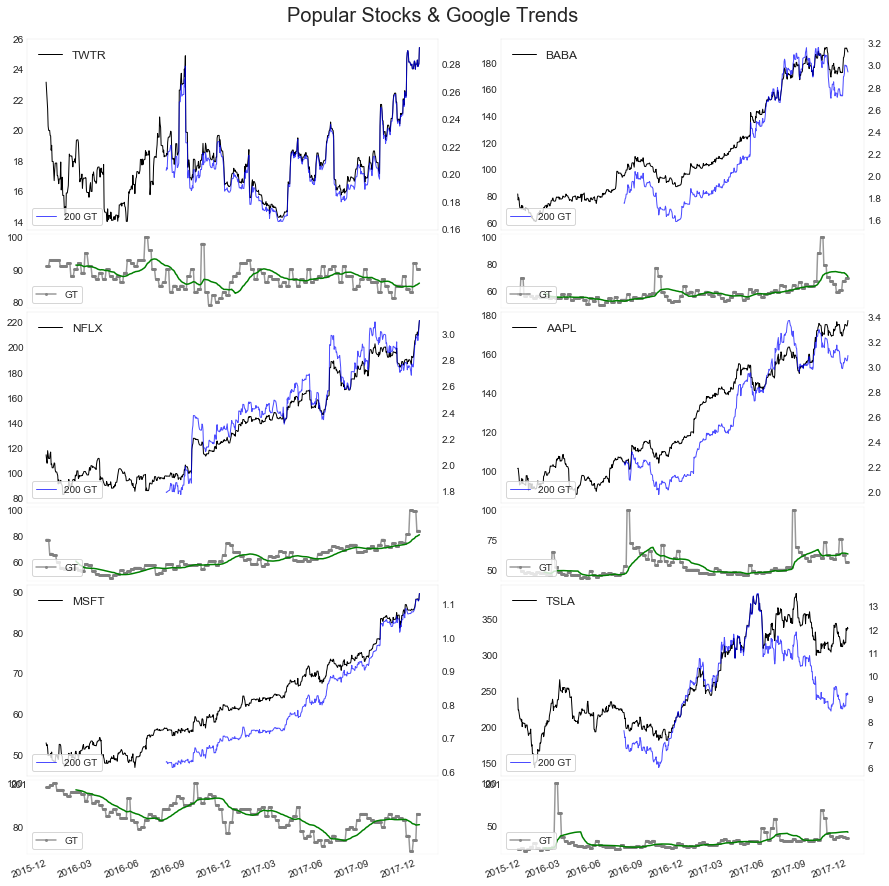

In [303]:
plt.style.use('seaborn-whitegrid')
plt.rcParams['axes.linewidth'] = 0.1

plt.figure(figsize=(15,15))

ax0 = plt.subplot2grid((21,18), (0,0), rowspan=5, colspan=9)
ax11 = plt.subplot2grid((21,18), (5,0), rowspan=2, colspan=9,sharex=ax0)
ax1 = plt.subplot2grid((21,18), (7,0), rowspan=5, colspan=9)
ax22 = plt.subplot2grid((21,18), (12,0), rowspan=2, colspan=9,sharex=ax1)
ax2 = plt.subplot2grid((21,18), (14,0), rowspan=5, colspan=9)
ax33 = plt.subplot2grid((21,18), (19,0), rowspan=2, colspan=9,sharex=ax2)
ax3 = plt.subplot2grid((21,18), (0,10), rowspan=5, colspan=9)
ax44 = plt.subplot2grid((21,18), (5,10), rowspan=2, colspan=9,sharex=ax3)
ax4 = plt.subplot2grid((21,18), (7,10), rowspan=5, colspan=9)
ax55 = plt.subplot2grid((21,18), (12,10), rowspan=2, colspan=9,sharex=ax4)
ax5 = plt.subplot2grid((21,18), (14,10), rowspan=5, colspan=9)
ax66 = plt.subplot2grid((21,18), (19,10), rowspan=2, colspan=9,sharex=ax5)

plt.subplots_adjust(hspace=0.1,wspace=0.5)

plt.suptitle('Popular Stocks & Google Trends',y=0.91, fontsize=20)

L = [11,22,33,44,55,66]

x = 0

for i in range(0,len(keywords)):
    
    globals()['df%s' % i]['Return'] = globals()['df%s' % i][searches[i]].pct_change()*100
    globals()['df%s' % i]['MA20'] = globals()['df%s' % i][searches[i]].rolling(20).mean()
    globals()['df%s' % i]['STD'] = globals()['df%s' % i][searches[i]].rolling(20).std()
    globals()['df%s' % i]['Upper'] = globals()['df%s' % i]['MA20'] + (globals()['df%s' % i]['STD'] * 2)
    
    globals()['df%s' % i]['MA50'] = globals()['df%s' % i][searches[i]].rolling(50).mean()
    globals()['df%s' % i]['MA100'] = globals()['df%s' % i][searches[i]].rolling(100).mean()
    globals()['df%s' % i]['MA200'] = globals()['df%s' % i][searches[i]].rolling(200).mean()
    
    globals()['ax%s' % i].plot(globals()['df%s' % i]['Adj Close'],color='k',label=keywords[i],lw=1)
    globals()['ax%s' % i].set_xticks([])
    globals()['ax%s' % i].grid(False)
    globals()['ax%s' % i].legend(loc=2,fontsize='large')
    
    globals()['ax%s' % 8] = globals()['ax%s' % i].twinx()
    ax8.plot(globals()['df%s' % i]['Adj Close']/globals()['df%s' % i]['MA200'],color='blue',alpha=0.7,label='200 GT',lw=1)
    ax8.legend(loc=3,frameon=1)
    ax8.grid(False)
    ax8.set_xticks([])
    
    globals()['ax%s' % L[x]].plot(globals()['df%s' % i][searches[i]],alpha=0.8,markevery=range(len(globals()['df%s' % i][searches[i]])),
                                  marker='o',markersize=2,color='grey',label='GT')
    globals()['ax%s' % L[x]].plot(globals()['df%s' % i]['MA50'],alpha=1,color='green',label='')
    globals()['ax%s' % L[x]].grid(False)
    globals()['ax%s' % L[x]].legend(loc=3,frameon=1)


    if i != 2 and i != 5 :
        globals()['ax%s' % L[x]].set_xticks([])
    else:
        for tick in globals()['ax%s' % L[x]].get_xticklabels():
            tick.set_rotation(20)
    x+=1
    
    
plt.savefig('C:\Users\Aleksander\Desktop\Trends.png',dpi=500,bbox_inches='tight',pad_inches=0)

(735964.0, 736738.0)

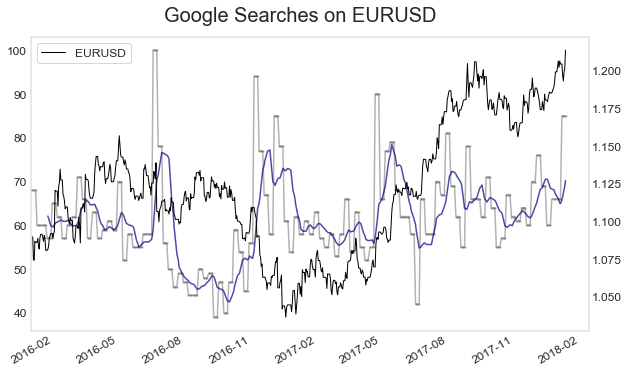

In [322]:
from pytrends.request import TrendReq
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt
import datetime as datetime
from datetime import timedelta
import quandl

%matplotlib inline

Today = datetime.datetime.now().strftime("%Y-%m-%d")
Limit = (datetime.datetime.now()+timedelta(30)).strftime("%Y-%m-%d")

pytrend = TrendReq()

start = '2016-01-01'

keyword = 'EURUSD'
data = 'ECB/EURUSD'

pytrend.build_payload(kw_list=[keyword],timeframe=start+' '+Today)
interest_over_time_df = pytrend.interest_over_time()

df = pd.DataFrame(interest_over_time_df[keyword])
Stock = quandl.get(data, collapse='daily', trim_start=start, trim_end=Today)

combo = df.merge(Stock,left_index=True,right_index=True,how='outer')
combo = combo.fillna(method='ffill')
combo.tail()
combo.columns = ['Search','Close']

plt.figure(figsize=(10,6))

ax1 = plt.subplot2grid((10,10), (0,0), rowspan=10, colspan=10)

plt.style.use('seaborn-white')
plt.rcParams['axes.linewidth'] = 0.1
plt.suptitle('Google Searches on '+str(keyword),y=0.95,fontsize=20)

combo.Search.plot(ax=ax1, color='grey', label='',markevery=range(len(combo.Search)),
                        marker='o',markersize=1,alpha=0.6)

combo.Search.rolling(20).mean().plot(ax=ax1, color='navy',label='',alpha=0.7)
ax1.legend(loc=2,fontsize='large',frameon=1)
ax1.tick_params(axis='both', which='major', labelsize=12)

ax2 = ax1.twinx()

combo.Close.plot(ax=ax2, color='black', label=str(keyword),lw=1)
ax2.legend(loc=2,  fontsize='large',frameon=1)
ax2.tick_params(axis='both', which='major', labelsize=12)

ax1.set_xlim([start, Limit])
ax2.set_xlim([start, Limit])